##### Copyright 2019 The TensorFlow IO Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 解码用于医学成像的 DICOM 文件

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://tensorflow.google.cn/io/tutorials/dicom"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">在 TensorFlow.org 上查看 </a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/io/tutorials/dicom.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行 </a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/io/tutorials/dicom.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">在 GitHub 中查看源代码</a></td>
      <td><a href="https://storage.googleapis.com/tensorflow_docs/io/docs/tutorials/dicom.ipynb">{img1下载笔记本</a></td>
</table>

## 概述

本教程将介绍如何在 TensorFlow IO 中使用 `tfio.image.decode_dicom_image` 通过 TensorFlow 解码 DICOM 文件。

## 设置和用法

#### 下载 DICOM 图像

本教程中使用的 DICOM 图像来自 [NIH Chest X-Ray 数据集](https://cloud.google.com/healthcare/docs/resources/public-datasets/nih-chest)。

NIH Chest X-Ray 数据集包含 NIH 临床中心提供的 100,000 张胸部 X 射线检查的去标识化 PNG 图像，可通过[此链接](https://nihcc.app.box.com/v/ChestXray-NIHCC)下载。

Google Cloud 还提供了可从 [Cloud Storage](https://cloud.google.com/healthcare/docs/resources/public-datasets/nih-chest) 中获得的 DICOM 版本图像。

在本教程中，您将从 [GitHub 仓库](https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm)下载数据集的样本文件

注：有关数据集的更多信息，请查看以下参考资料：

- Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, Ronald Summers, ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases, IEEE CVPR, pp. 3462-3471, 2017


In [2]:
!curl -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm
!ls -l dicom_00000001_000.dcm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100   164  100   164    0     0    315      0 --:--:-- --:--:-- --:--:--   315
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100 1024k  100 1024k    0     0   964k      0  0:00:01  0:00:01 --:--:-- 2005k


-rw-rw-r-- 1 kbuilder kokoro 1049332 Aug 25 19:10 dicom_00000001_000.dcm


### 安装要求的软件包，然后重新启动运行时

In [3]:
try:
  # Use the Colab's preinstalled TensorFlow 2.x
  %tensorflow_version 2.x 
except:
  pass

In [4]:
!pip install tensorflow-io

     |▏                               | 81 kB 4.8 MB/s eta 0:00:05

     |██▊                             | 1.9 MB 4.1 MB/s eta 0:00:06

     |█████████▉                      | 7.0 MB 4.1 MB/s eta 0:00:04

     |██████████████████              | 12.7 MB 4.1 MB/s eta 0:00:03

     |██████████████████████████▏     | 18.5 MB 4.1 MB/s eta 0:00:02

     |████████████████████████████████| 22.7 MB 4.1 MB/s eta 0:00:01

     |████████████████████████████████| 22.7 MB 4.1 MB/s 


     |████████████████████████████████| 2.3 MB 64.6 MB/s 


You should consider upgrading via the '/tmpfs/src/tf_docs_env/bin/python -m pip install --upgrade pip' command.


### 解码 DICOM 图像

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

2021-08-25 19:10:26.074099: W tensorflow_io/core/kernels/audio_video_mp3_kernels.cc:271] libmp3lame.so.0 or lame functions are not available


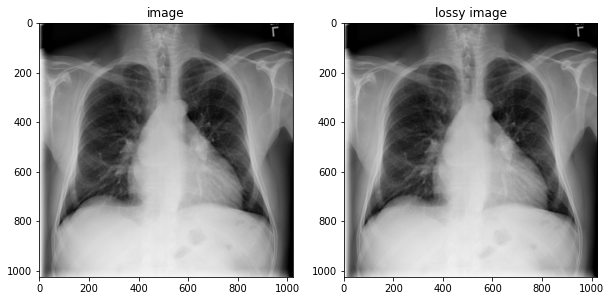

In [6]:
import tensorflow_io as tfio

image_bytes = tf.io.read_file('dicom_00000001_000.dcm')

image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

## 文档

此软件包具有两个包装 `DCMTK` 函数的运算。`decode_dicom_image` 可以解码 DICOM 文件中的像素数据，`decode_dicom_data` 可以解码标记信息。`tags` 包含有用的 DICOM 标记，例如 `tags.PatientsName`。标记表示法借用自 [`pydicom`](https://pydicom.github.io/) dicom 软件包。

### 获取 DICOM 图像数据

```python
io.dicom.decode_dicom_image(
    contents,
    color_dim=False,
    on_error='skip',
    scale='preserve',
    dtype=tf.uint16,
    name=None
)
```

- **`contents`**：字符串类型的张量。零维。字节字符串编码的 DICOM 文件
- **`color_dim`**：可选的 `bool`。默认值为 `False`。如果为 `True`，则第三个通道将附加到构成三维张量的所有图像。1024 x 1024 灰度图像将变为 1024 x 1024 x 1
- **`on_error`**：默认值为 `skip`。如果在打开图像时发生错误，或者输出类型不能容纳所有可能的输入值，则此特性会确定行为。例如，当用户将输出 dtype 设置为 `tf.uint8`，但 dicom 图像存储 `tf.uint16` 类型时。`strict` 会引发错误。`skip` 会返回一个一维空张量。`lossy` 将继续执行通过 `scale` 特性缩放值的运算。
- **`scale`**：默认值为 `preserve`。此特性确定如何处理输入值的比例。`auto` 将自动缩放输入值，如果输出类型为整数，`auto` 将使用最大输出比例，例如，可以将存储 [0, 255] 范围内值的 `uint8` 线性拉伸以填充 `uint16`，即 [0,65535]。如果输出为浮点数，`auto` 将缩放为 [0,1]。`preserve` 可按原样保留值，大于最大可能输出的输入值将被裁剪。
- **`dtype`**：以下数据类型的可选 `tf.DType`：`tf.uint8, tf.uint16, tf.uint32, tf.uint64, tf.float16, tf.float32, tf.float64`。默认值为 `tf.uint16`。
- **`name`**：运算的名称（可选）。

**返回值** 一个类型为 `dtype` 的 `Tensor`，其形状由 DICOM 文件确定。

### 获取 DICOM 标记数据

```python
io.dicom.decode_dicom_data(
    contents,
    tags=None,
    name=None
)
```

- **`contents`**：字符串类型的张量。零维。字节字符串编码的 DICOM 文件
- **`tags`**：任意维度的 `tf.uint32` 类型张量。这些 `uint32` 数字可以直接映射到 DICOM 标记
- **`name`**：运算的名称（可选）。

**返回值** 一个类型为 `tf.string` 且形状与 `tags` 相同的 `Tensor`。如果 dicom 标记是一个字符串列表，则它们会组合成一个字符串，并用双反斜杠 `**返回值** 一个类型为 `tf.string`且形状与`tags`相同的`Tensor`。如果 dicom 标记是一个字符串列表，则它们会组合成一个字符串，并用双反斜杠  分隔。如果标记是一个数字列表，则 [DCMTK](https://support.dcmtk.org/docs/) 中会出现错误，只有第 0 个元素会作为字符串返回。

### Bibtex

如果此软件包有帮助，请引用以下内容：

```
@misc{marcelo_lerendegui_2019_3337331,
  author       = {Marcelo Lerendegui and
                  Ouwen Huang},
  title        = {Tensorflow Dicom Decoder},
  month        = jul,
  year         = 2019,
  doi          = {10.5281/zenodo.3337331},
  url          = {https://doi.org/10.5281/zenodo.3337331}
}
```

### 许可

Copyright 2019 Marcelo Lerendegui, Ouwen Huang, Gradient Health Inc.

根据 Apache 许可 2.0（“许可”）获得许可；除非遵循许可要求，否则您不得使用此文件。您可在以下网址获得许可的副本：

http://www.apache.org/licenses/LICENSE-2.0

除非适用法律要求或以书面形式同意，否则在本许可下分发的软件将在“按原样”基础上分发，不存在任何明示或暗示的任何类型的保证或条件。有关在本许可下管理权限和限制的特定语言，请参阅本许可。